# problem statement
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

# importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy.stats import zscore

# loading the dataset

In [6]:
dfloan=pd.read_csv("loan.csv")

In [7]:
dfloan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
dfloan.shape

(614, 13)

the dataset contains 614 rows and 13 columns

In [9]:
dfloan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

the dataset contains a mix of object and float64 type data

## checking null values

In [10]:
dfloan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

many columns in the dataset contains null values

In [11]:
dfloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
dfloan.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# EDA

<AxesSubplot:xlabel='Gender', ylabel='count'>

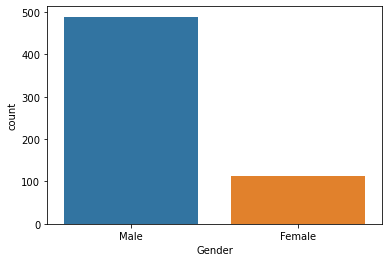

In [17]:
sns.countplot(dfloan["Gender"])

in the dataset, the number of male applicants are more than number of female ones

<AxesSubplot:xlabel='Married', ylabel='count'>

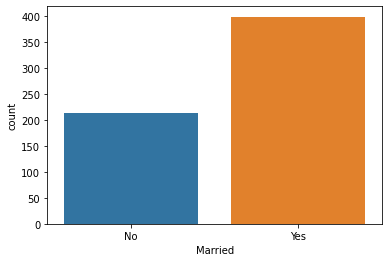

In [19]:
sns.countplot(dfloan["Married"])

majority of the applicants in the dataset are married

<AxesSubplot:xlabel='Education', ylabel='count'>

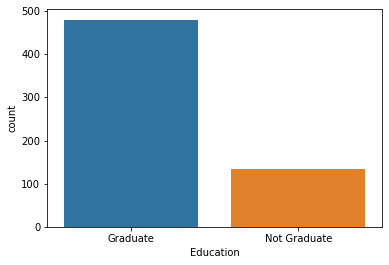

In [20]:
sns.countplot(dfloan["Education"])

majority of the people in the dataset are graduate and only close to 100 are non graduates out of 614 respondants

<AxesSubplot:xlabel='Dependents', ylabel='count'>

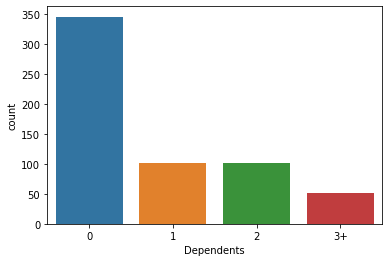

In [21]:
sns.countplot(dfloan["Dependents"])

close to 350 loan applicants have 0 dependents and nearly 50 have more than 3 dependents

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

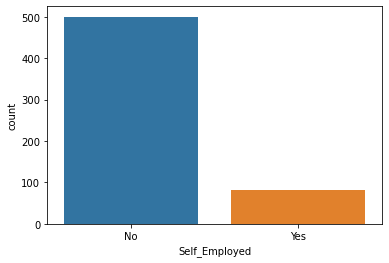

In [22]:
sns.countplot(dfloan["Self_Employed"])

very less applicants are self employed, this means that employed people have greater requirment of loan

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

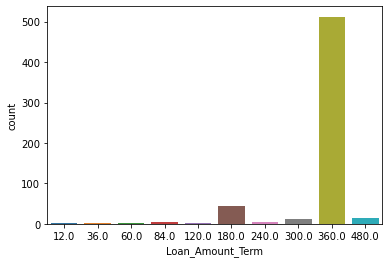

In [23]:
sns.countplot(dfloan["Loan_Amount_Term"])

maximum people apply for a loan amount term of between 320 to 400

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

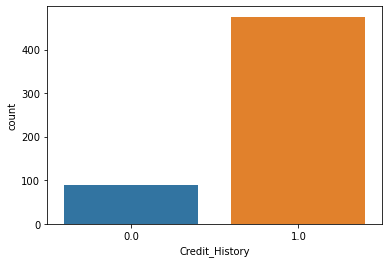

In [24]:
sns.countplot(dfloan["Credit_History"])

more than 400 applicants have a credit history of 1

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

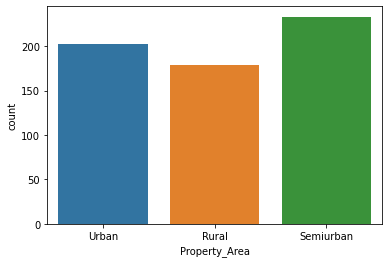

In [25]:
sns.countplot(dfloan["Property_Area"])

maximum applicants are from semiurban area, and less are from rural areas

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

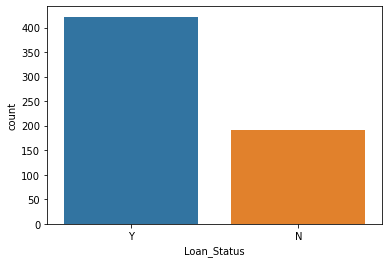

In [26]:
sns.countplot(dfloan["Loan_Status"])

maximum applicants have a loan status of YES

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

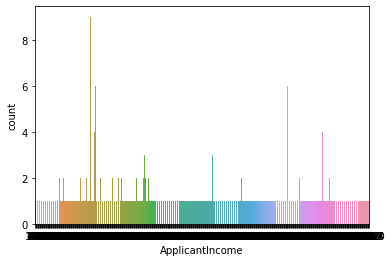

In [27]:
sns.countplot(dfloan["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='count'>

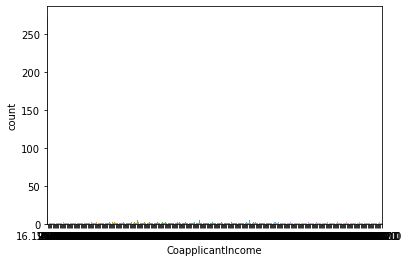

In [28]:
sns.countplot(dfloan["CoapplicantIncome"])

<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

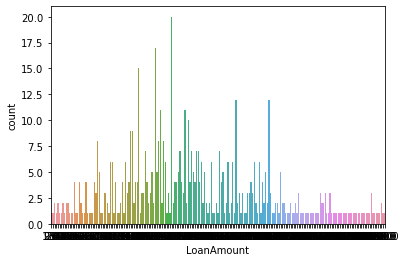

In [29]:
sns.countplot(dfloan["LoanAmount"])

from the plots it can be seen that LoanAmount, CoapplicantIncome and ApplicantIncome are continous variables and rest are categorical variables

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

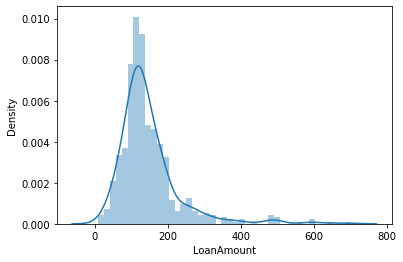

In [32]:
sns.distplot(dfloan["LoanAmount"],kde=True)

maximum loan amount is between 100 and 200

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

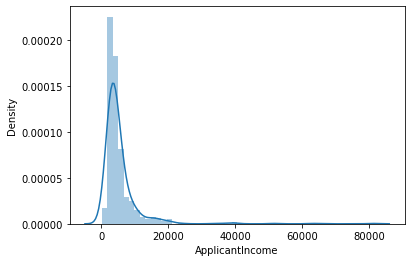

In [35]:
sns.distplot(dfloan["ApplicantIncome"],kde=True)

maximum of the applicants have a income between 5000 to 20000

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

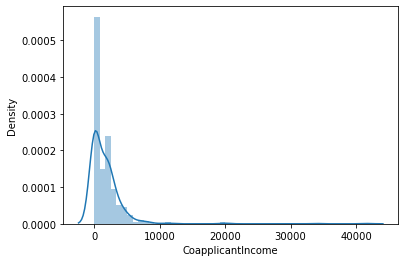

In [37]:
sns.distplot(dfloan["CoapplicantIncome"],kde=True)

maximum coapplicants have income less than 5000

# using Simple imputer to remove null values

In [46]:
from sklearn.impute import SimpleImputer


In [51]:
imp=SimpleImputer(missing_values=np.NaN,strategy="most_frequent")

In [48]:
l=["Gender","Married","Self_Employed","Dependents"]

In [49]:
for i in l:
    dfloan[i]=imp.fit_transform(dfloan[i].values.reshape(-1,1))

In [52]:
dfloan['Credit_History']=imp.fit_transform(dfloan['Credit_History'].values.reshape(-1,1))

In [53]:
imp=SimpleImputer(missing_values=np.NaN,strategy="mean")
list=['LoanAmount','Loan_Amount_Term']
for i in list:
    dfloan[i]=imp.fit_transform(dfloan[i].values.reshape(-1,1))

In [54]:
dfloan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

null values have been removed

In [56]:
dfloan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

the load ID columns contains 614 unique values and therefore we can drop it

In [57]:
dfloan.drop(["Loan_ID"],axis=1,inplace=True)

# label encoding

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le=LabelEncoder()

In [61]:
list=["Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]
for i in list:
    dfloan[i]=le.fit_transform(dfloan[i])

# Descriptive Statistics

In [67]:
dfloan.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


outliers are present in some columns like Applicant Income and CoapplicantIncome and Loan Amount Term

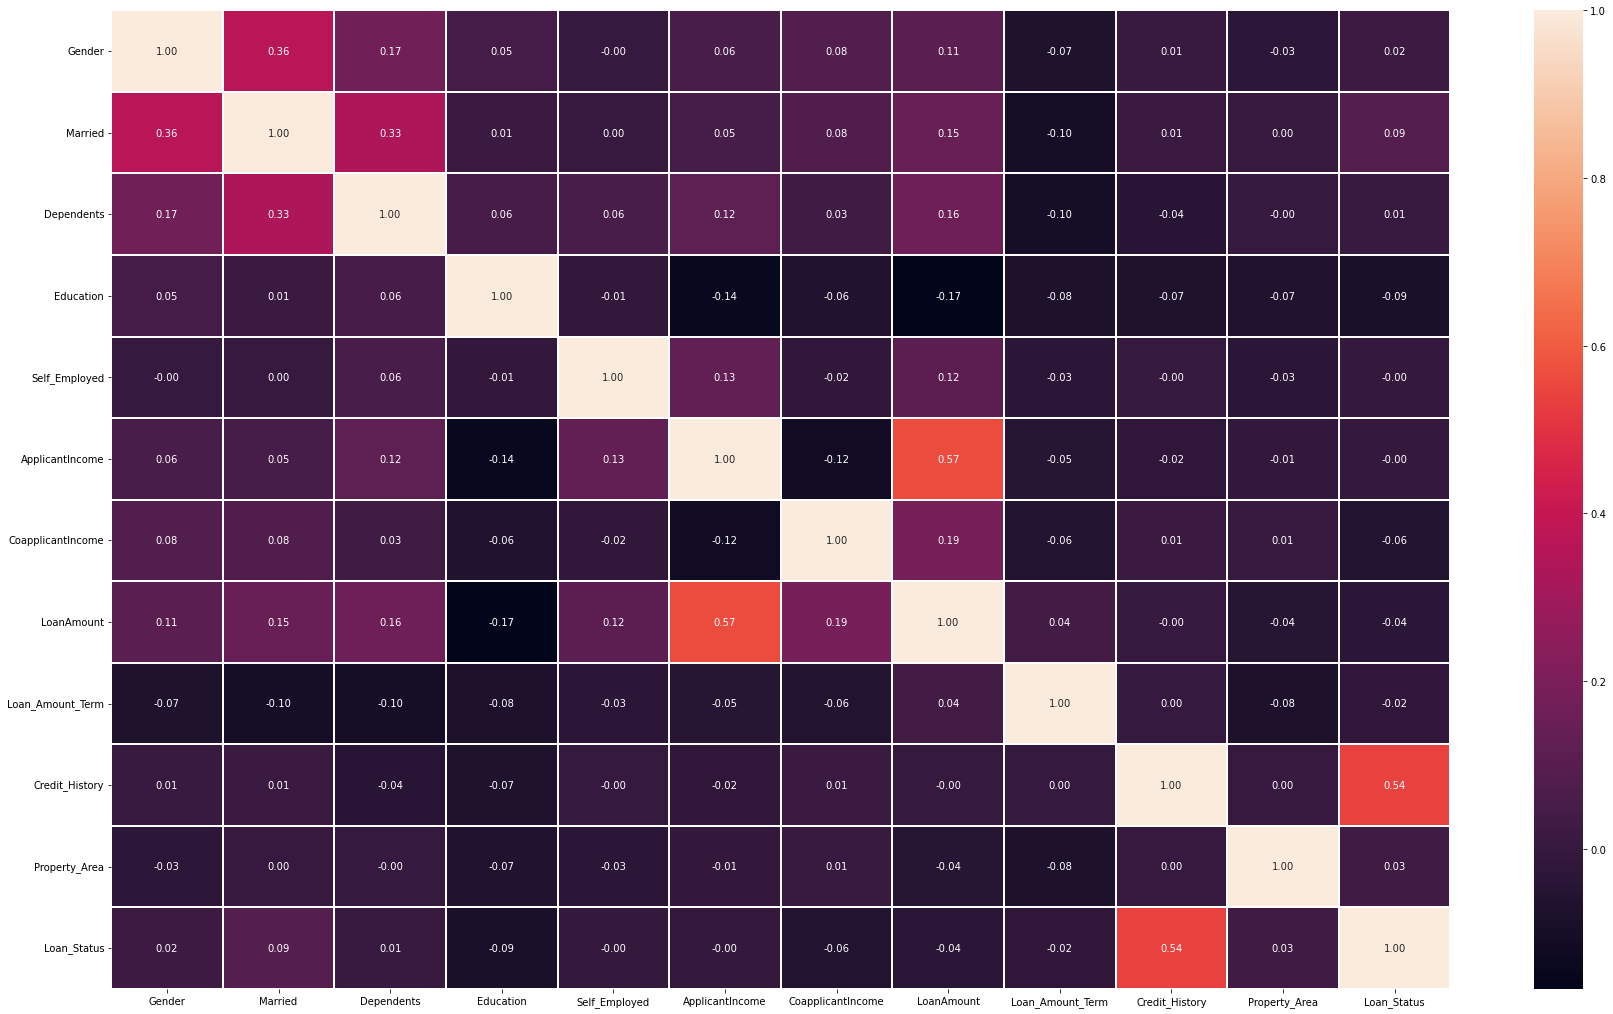

In [69]:
plt.figure(figsize=(30,18))
sns.heatmap(dfloan.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

no presence of any multicollinerity

In [70]:
dfloan.corr()["Loan_Status"].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

we can drop the self employed column the target variable Loan_Status has 0.3% correlation with this column 

In [72]:
dfloan.drop(["Self_Employed"],axis=1,inplace=True)

## Further visualisation

<AxesSubplot:xlabel='Loan_Status', ylabel='Gender'>

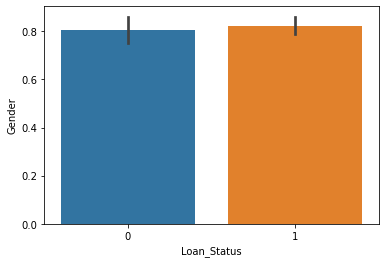

In [79]:
sns.barplot(y=dfloan['Gender'],x=dfloan['Loan_Status'])

<AxesSubplot:xlabel='Loan_Status', ylabel='Dependents'>

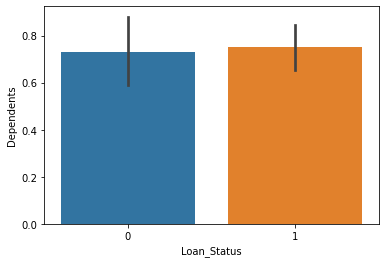

In [78]:
sns.barplot(y=dfloan['Dependents'],x=dfloan['Loan_Status'])

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

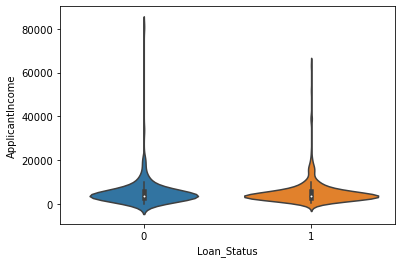

In [82]:
sns.violinplot(y=dfloan['ApplicantIncome'],x=dfloan['Loan_Status'])

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

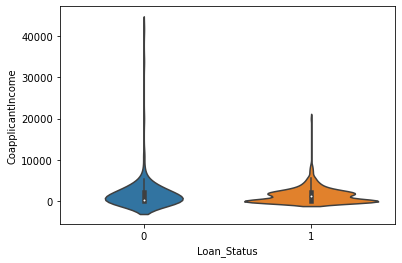

In [84]:
sns.violinplot(y=dfloan['CoapplicantIncome'],x=dfloan['Loan_Status'])

# boxplot

Gender                  AxesSubplot(0.125,0.657941;0.168478x0.222059)
Married              AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Dependents           AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Education            AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Self_Employed           AxesSubplot(0.125,0.391471;0.168478x0.222059)
ApplicantIncome      AxesSubplot(0.327174,0.391471;0.168478x0.222059)
CoapplicantIncome    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
LoanAmount           AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Loan_Amount_Term           AxesSubplot(0.125,0.125;0.168478x0.222059)
Credit_History          AxesSubplot(0.327174,0.125;0.168478x0.222059)
Property_Area           AxesSubplot(0.529348,0.125;0.168478x0.222059)
Loan_Status             AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

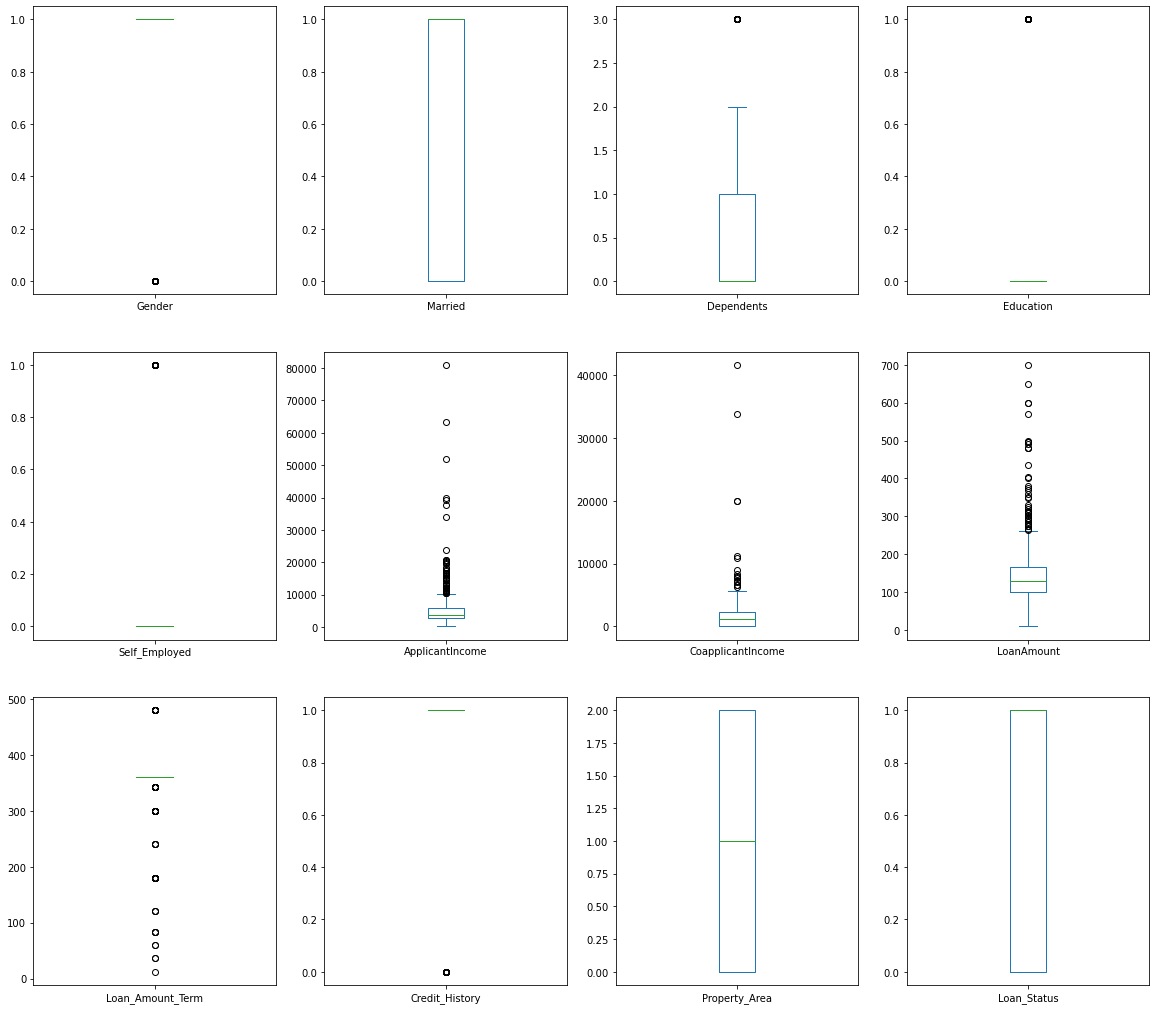

In [63]:
dfloan.plot(kind='box',subplots=True,layout=(3,4),figsize=(20,18))

## removal of outliers using Zscore

In [85]:
from scipy.stats import zscore
z=np.abs(zscore(dfloan))

In [86]:
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([5, 7, 7, 7, 4, 6, 7, 4, 6, 4, 6, 5, 6, 4, 4, 7, 7, 6, 6, 7, 4, 6,
        6, 5, 4, 5, 6, 4, 6, 7, 7, 6, 6, 6, 7, 6, 7, 5, 7, 5, 6],
       dtype=int64))

In [87]:
dfnew=dfloan[(z<3).all(axis=1)]

In [88]:
dfnew.shape

(577, 11)

%loss of data=(614-577)/614 * 100 =6%

# skewness removal

In [89]:
dfnew.skew().sort_values()

Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Gender              -1.622920
Loan_Status         -0.822635
Married             -0.630211
Property_Area       -0.055332
Dependents           1.052106
LoanAmount           1.113132
Education            1.306588
CoapplicantIncome    1.350517
ApplicantIncome      2.148522
dtype: float64

In [90]:
list=["Loan_Amount_Term","Credit_History","Gender","CoapplicantIncome","ApplicantIncome","Education","LoanAmount"]

In [91]:
for i in list:
    if dfnew.skew().loc[i]>0.5:
        dfnew[i]=np.log1p(dfnew[i])

In [92]:
dfnew.skew().sort_values()

Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Gender              -1.622920
Loan_Status         -0.822635
LoanAmount          -0.697883
Married             -0.630211
CoapplicantIncome   -0.216757
ApplicantIncome     -0.204913
Property_Area       -0.055332
Dependents           1.052106
Education            1.306588
dtype: float64

# Standard Scaler

In [94]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [95]:
x=dfnew.drop(["Loan_Status"],axis=1)
y=dfnew["Loan_Status"]

In [96]:
dfx=sc.fit_transform(x)

In [97]:
dfx.mean()

3.7374301612338027e-16

# application of machine learning models

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [99]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((accuracy_score(y_test,pred_test))>maxacc):
            maxacc=accuracy_score(y_test,pred_test)
            rs=i
        print(f"at random state {i},  accuracy score is {accuracy_score(y_test,pred_test)}")
        print(f"at random state {i}, confusion matrix is {confusion_matrix(y_test,pred_test)}")
        print(f"at random state {i}, classification report is {classification_report(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)
   

## KNeighbors Classifier

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
model_selection(knn)

at random state 0,  accuracy score is 0.8103448275862069
at random state 0, confusion matrix is [[ 26  27]
 [  6 115]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.81      0.49      0.61        53
           1       0.81      0.95      0.87       121

    accuracy                           0.81       174
   macro avg       0.81      0.72      0.74       174
weighted avg       0.81      0.81      0.79       174



at random state 1,  accuracy score is 0.7988505747126436
at random state 1, confusion matrix is [[ 17  32]
 [  3 122]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.85      0.35      0.49        49
           1       0.79      0.98      0.87       125

    accuracy                           0.80       174
   macro avg       0.82      0.66      0.68       174
weighted avg       0.81      0.80      0.77       174



at random state 

at random state 18, classification report is               precision    recall  f1-score   support

           0       0.95      0.29      0.44        63
           1       0.71      0.99      0.83       111

    accuracy                           0.74       174
   macro avg       0.83      0.64      0.63       174
weighted avg       0.80      0.74      0.69       174



at random state 19,  accuracy score is 0.7988505747126436
at random state 19, confusion matrix is [[ 27  33]
 [  2 112]]
at random state 19, classification report is               precision    recall  f1-score   support

           0       0.93      0.45      0.61        60
           1       0.77      0.98      0.86       114

    accuracy                           0.80       174
   macro avg       0.85      0.72      0.74       174
weighted avg       0.83      0.80      0.78       174



at random state 20,  accuracy score is 0.7931034482758621
at random state 20, confusion matrix is [[ 20  33]
 [  3 118]]
at random 

at random state 36,  accuracy score is 0.8160919540229885
at random state 36, confusion matrix is [[ 19  29]
 [  3 123]]
at random state 36, classification report is               precision    recall  f1-score   support

           0       0.86      0.40      0.54        48
           1       0.81      0.98      0.88       126

    accuracy                           0.82       174
   macro avg       0.84      0.69      0.71       174
weighted avg       0.82      0.82      0.79       174



at random state 37,  accuracy score is 0.7931034482758621
at random state 37, confusion matrix is [[ 22  34]
 [  2 116]]
at random state 37, classification report is               precision    recall  f1-score   support

           0       0.92      0.39      0.55        56
           1       0.77      0.98      0.87       118

    accuracy                           0.79       174
   macro avg       0.84      0.69      0.71       174
weighted avg       0.82      0.79      0.76       174



at random 

at random state 56, confusion matrix is [[ 20  29]
 [  4 121]]
at random state 56, classification report is               precision    recall  f1-score   support

           0       0.83      0.41      0.55        49
           1       0.81      0.97      0.88       125

    accuracy                           0.81       174
   macro avg       0.82      0.69      0.71       174
weighted avg       0.81      0.81      0.79       174



at random state 57,  accuracy score is 0.7931034482758621
at random state 57, confusion matrix is [[ 27  34]
 [  2 111]]
at random state 57, classification report is               precision    recall  f1-score   support

           0       0.93      0.44      0.60        61
           1       0.77      0.98      0.86       113

    accuracy                           0.79       174
   macro avg       0.85      0.71      0.73       174
weighted avg       0.82      0.79      0.77       174



at random state 58,  accuracy score is 0.8218390804597702
at random 

at random state 74, classification report is               precision    recall  f1-score   support

           0       0.87      0.39      0.54        67
           1       0.72      0.96      0.82       107

    accuracy                           0.74       174
   macro avg       0.79      0.68      0.68       174
weighted avg       0.77      0.74      0.71       174



at random state 75,  accuracy score is 0.8218390804597702
at random state 75, confusion matrix is [[ 23  27]
 [  4 120]]
at random state 75, classification report is               precision    recall  f1-score   support

           0       0.85      0.46      0.60        50
           1       0.82      0.97      0.89       124

    accuracy                           0.82       174
   macro avg       0.83      0.71      0.74       174
weighted avg       0.83      0.82      0.80       174



at random state 76,  accuracy score is 0.7873563218390804
at random state 76, confusion matrix is [[ 27  36]
 [  1 110]]
at random 

at random state 96,  accuracy score is 0.8218390804597702
at random state 96, confusion matrix is [[ 19  28]
 [  3 124]]
at random state 96, classification report is               precision    recall  f1-score   support

           0       0.86      0.40      0.55        47
           1       0.82      0.98      0.89       127

    accuracy                           0.82       174
   macro avg       0.84      0.69      0.72       174
weighted avg       0.83      0.82      0.80       174



at random state 97,  accuracy score is 0.7931034482758621
at random state 97, confusion matrix is [[ 20  31]
 [  5 118]]
at random state 97, classification report is               precision    recall  f1-score   support

           0       0.80      0.39      0.53        51
           1       0.79      0.96      0.87       123

    accuracy                           0.79       174
   macro avg       0.80      0.68      0.70       174
weighted avg       0.79      0.79      0.77       174



at random 

CV Score

In [109]:
score=cross_val_score(knn,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.80172414 0.76724138 0.7826087  0.85217391 0.8173913 ]
0.8042278860569715
0.029372629826578754


## LogisticRegression

In [117]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
model_selection(lg)

at random state 0,  accuracy score is 0.8333333333333334
at random state 0, confusion matrix is [[ 26  27]
 [  2 119]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.93      0.49      0.64        53
           1       0.82      0.98      0.89       121

    accuracy                           0.83       174
   macro avg       0.87      0.74      0.77       174
weighted avg       0.85      0.83      0.82       174



at random state 1,  accuracy score is 0.8045977011494253
at random state 1, confusion matrix is [[ 17  32]
 [  2 123]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.89      0.35      0.50        49
           1       0.79      0.98      0.88       125

    accuracy                           0.80       174
   macro avg       0.84      0.67      0.69       174
weighted avg       0.82      0.80      0.77       174



at random state 

at random state 32,  accuracy score is 0.8103448275862069
at random state 32, confusion matrix is [[ 21  33]
 [  0 120]]
at random state 32, classification report is               precision    recall  f1-score   support

           0       1.00      0.39      0.56        54
           1       0.78      1.00      0.88       120

    accuracy                           0.81       174
   macro avg       0.89      0.69      0.72       174
weighted avg       0.85      0.81      0.78       174



at random state 33,  accuracy score is 0.8448275862068966
at random state 33, confusion matrix is [[ 18  24]
 [  3 129]]
at random state 33, classification report is               precision    recall  f1-score   support

           0       0.86      0.43      0.57        42
           1       0.84      0.98      0.91       132

    accuracy                           0.84       174
   macro avg       0.85      0.70      0.74       174
weighted avg       0.85      0.84      0.82       174



at random 

at random state 49, confusion matrix is [[ 27  29]
 [  3 115]]
at random state 49, classification report is               precision    recall  f1-score   support

           0       0.90      0.48      0.63        56
           1       0.80      0.97      0.88       118

    accuracy                           0.82       174
   macro avg       0.85      0.73      0.75       174
weighted avg       0.83      0.82      0.80       174



at random state 50,  accuracy score is 0.8333333333333334
at random state 50, confusion matrix is [[ 25  27]
 [  2 120]]
at random state 50, classification report is               precision    recall  f1-score   support

           0       0.93      0.48      0.63        52
           1       0.82      0.98      0.89       122

    accuracy                           0.83       174
   macro avg       0.87      0.73      0.76       174
weighted avg       0.85      0.83      0.81       174



at random state 51,  accuracy score is 0.8333333333333334
at random 

at random state 66,  accuracy score is 0.8160919540229885
at random state 66, confusion matrix is [[ 24  29]
 [  3 118]]
at random state 66, classification report is               precision    recall  f1-score   support

           0       0.89      0.45      0.60        53
           1       0.80      0.98      0.88       121

    accuracy                           0.82       174
   macro avg       0.85      0.71      0.74       174
weighted avg       0.83      0.82      0.80       174



at random state 67,  accuracy score is 0.7758620689655172
at random state 67, confusion matrix is [[ 27  36]
 [  3 108]]
at random state 67, classification report is               precision    recall  f1-score   support

           0       0.90      0.43      0.58        63
           1       0.75      0.97      0.85       111

    accuracy                           0.78       174
   macro avg       0.82      0.70      0.71       174
weighted avg       0.80      0.78      0.75       174



at random 

at random state 84, classification report is               precision    recall  f1-score   support

           0       1.00      0.52      0.69        46
           1       0.85      1.00      0.92       128

    accuracy                           0.87       174
   macro avg       0.93      0.76      0.80       174
weighted avg       0.89      0.87      0.86       174



at random state 85,  accuracy score is 0.7873563218390804
at random state 85, confusion matrix is [[ 22  36]
 [  1 115]]
at random state 85, classification report is               precision    recall  f1-score   support

           0       0.96      0.38      0.54        58
           1       0.76      0.99      0.86       116

    accuracy                           0.79       174
   macro avg       0.86      0.69      0.70       174
weighted avg       0.83      0.79      0.76       174



at random state 86,  accuracy score is 0.8735632183908046
at random state 86, confusion matrix is [[ 33  22]
 [  0 119]]
at random 

CV Score

In [111]:
score=cross_val_score(lg,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.81034483 0.79310345 0.79130435 0.86086957 0.83478261]
0.8180809595202397
0.02649724741088433


## DecisionTreeClassifier

In [112]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model_selection(dtc)

at random state 0,  accuracy score is 0.7873563218390804
at random state 0, confusion matrix is [[ 34  19]
 [ 18 103]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.65      0.64      0.65        53
           1       0.84      0.85      0.85       121

    accuracy                           0.79       174
   macro avg       0.75      0.75      0.75       174
weighted avg       0.79      0.79      0.79       174



at random state 1,  accuracy score is 0.7183908045977011
at random state 1, confusion matrix is [[ 23  26]
 [ 23 102]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.50      0.47      0.48        49
           1       0.80      0.82      0.81       125

    accuracy                           0.72       174
   macro avg       0.65      0.64      0.65       174
weighted avg       0.71      0.72      0.72       174



at random state 

at random state 21, confusion matrix is [[30 20]
 [27 97]]
at random state 21, classification report is               precision    recall  f1-score   support

           0       0.53      0.60      0.56        50
           1       0.83      0.78      0.80       124

    accuracy                           0.73       174
   macro avg       0.68      0.69      0.68       174
weighted avg       0.74      0.73      0.73       174



at random state 22,  accuracy score is 0.6954022988505747
at random state 22, confusion matrix is [[ 19  27]
 [ 26 102]]
at random state 22, classification report is               precision    recall  f1-score   support

           0       0.42      0.41      0.42        46
           1       0.79      0.80      0.79       128

    accuracy                           0.70       174
   macro avg       0.61      0.60      0.61       174
weighted avg       0.69      0.70      0.69       174



at random state 23,  accuracy score is 0.6436781609195402
at random stat

at random state 39, confusion matrix is [[ 32  18]
 [ 23 101]]
at random state 39, classification report is               precision    recall  f1-score   support

           0       0.58      0.64      0.61        50
           1       0.85      0.81      0.83       124

    accuracy                           0.76       174
   macro avg       0.72      0.73      0.72       174
weighted avg       0.77      0.76      0.77       174



at random state 40,  accuracy score is 0.7241379310344828
at random state 40, confusion matrix is [[34 15]
 [33 92]]
at random state 40, classification report is               precision    recall  f1-score   support

           0       0.51      0.69      0.59        49
           1       0.86      0.74      0.79       125

    accuracy                           0.72       174
   macro avg       0.68      0.71      0.69       174
weighted avg       0.76      0.72      0.73       174



at random state 41,  accuracy score is 0.6839080459770115
at random stat

at random state 61,  accuracy score is 0.6954022988505747
at random state 61, confusion matrix is [[27 31]
 [22 94]]
at random state 61, classification report is               precision    recall  f1-score   support

           0       0.55      0.47      0.50        58
           1       0.75      0.81      0.78       116

    accuracy                           0.70       174
   macro avg       0.65      0.64      0.64       174
weighted avg       0.69      0.70      0.69       174



at random state 62,  accuracy score is 0.6839080459770115
at random state 62, confusion matrix is [[28 30]
 [25 91]]
at random state 62, classification report is               precision    recall  f1-score   support

           0       0.53      0.48      0.50        58
           1       0.75      0.78      0.77       116

    accuracy                           0.68       174
   macro avg       0.64      0.63      0.64       174
weighted avg       0.68      0.68      0.68       174



at random state 63

at random state 83,  accuracy score is 0.7183908045977011
at random state 83, confusion matrix is [[29 28]
 [21 96]]
at random state 83, classification report is               precision    recall  f1-score   support

           0       0.58      0.51      0.54        57
           1       0.77      0.82      0.80       117

    accuracy                           0.72       174
   macro avg       0.68      0.66      0.67       174
weighted avg       0.71      0.72      0.71       174



at random state 84,  accuracy score is 0.6724137931034483
at random state 84, confusion matrix is [[24 22]
 [35 93]]
at random state 84, classification report is               precision    recall  f1-score   support

           0       0.41      0.52      0.46        46
           1       0.81      0.73      0.77       128

    accuracy                           0.67       174
   macro avg       0.61      0.62      0.61       174
weighted avg       0.70      0.67      0.68       174



at random state 85

CV Score

In [113]:
score=cross_val_score(dtc,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.70689655 0.63793103 0.72173913 0.7826087  0.71304348]
0.7124437781109445
0.046027816703050034


## RandomForestClassifier

In [114]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_selection(rf)

at random state 0,  accuracy score is 0.8333333333333334
at random state 0, confusion matrix is [[ 28  25]
 [  4 117]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.88      0.53      0.66        53
           1       0.82      0.97      0.89       121

    accuracy                           0.83       174
   macro avg       0.85      0.75      0.77       174
weighted avg       0.84      0.83      0.82       174



at random state 1,  accuracy score is 0.764367816091954
at random state 1, confusion matrix is [[ 18  31]
 [ 10 115]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.64      0.37      0.47        49
           1       0.79      0.92      0.85       125

    accuracy                           0.76       174
   macro avg       0.72      0.64      0.66       174
weighted avg       0.75      0.76      0.74       174



at random state 2

at random state 18,  accuracy score is 0.7413793103448276
at random state 18, confusion matrix is [[ 21  42]
 [  3 108]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.88      0.33      0.48        63
           1       0.72      0.97      0.83       111

    accuracy                           0.74       174
   macro avg       0.80      0.65      0.66       174
weighted avg       0.78      0.74      0.70       174



at random state 19,  accuracy score is 0.8045977011494253
at random state 19, confusion matrix is [[ 31  29]
 [  5 109]]
at random state 19, classification report is               precision    recall  f1-score   support

           0       0.86      0.52      0.65        60
           1       0.79      0.96      0.87       114

    accuracy                           0.80       174
   macro avg       0.83      0.74      0.76       174
weighted avg       0.81      0.80      0.79       174



at random 

at random state 35, confusion matrix is [[ 25  28]
 [  6 115]]
at random state 35, classification report is               precision    recall  f1-score   support

           0       0.81      0.47      0.60        53
           1       0.80      0.95      0.87       121

    accuracy                           0.80       174
   macro avg       0.81      0.71      0.73       174
weighted avg       0.80      0.80      0.79       174



at random state 36,  accuracy score is 0.8103448275862069
at random state 36, confusion matrix is [[ 23  25]
 [  8 118]]
at random state 36, classification report is               precision    recall  f1-score   support

           0       0.74      0.48      0.58        48
           1       0.83      0.94      0.88       126

    accuracy                           0.81       174
   macro avg       0.78      0.71      0.73       174
weighted avg       0.80      0.81      0.80       174



at random state 37,  accuracy score is 0.7758620689655172
at random 

at random state 52, confusion matrix is [[ 30  22]
 [  2 120]]
at random state 52, classification report is               precision    recall  f1-score   support

           0       0.94      0.58      0.71        52
           1       0.85      0.98      0.91       122

    accuracy                           0.86       174
   macro avg       0.89      0.78      0.81       174
weighted avg       0.87      0.86      0.85       174



at random state 53,  accuracy score is 0.8160919540229885
at random state 53, confusion matrix is [[ 29  29]
 [  3 113]]
at random state 53, classification report is               precision    recall  f1-score   support

           0       0.91      0.50      0.64        58
           1       0.80      0.97      0.88       116

    accuracy                           0.82       174
   macro avg       0.85      0.74      0.76       174
weighted avg       0.83      0.82      0.80       174



at random state 54,  accuracy score is 0.7758620689655172
at random 

at random state 69, classification report is               precision    recall  f1-score   support

           0       0.92      0.41      0.57        56
           1       0.78      0.98      0.87       118

    accuracy                           0.80       174
   macro avg       0.85      0.70      0.72       174
weighted avg       0.82      0.80      0.77       174



at random state 70,  accuracy score is 0.7528735632183908
at random state 70, confusion matrix is [[ 27  34]
 [  9 104]]
at random state 70, classification report is               precision    recall  f1-score   support

           0       0.75      0.44      0.56        61
           1       0.75      0.92      0.83       113

    accuracy                           0.75       174
   macro avg       0.75      0.68      0.69       174
weighted avg       0.75      0.75      0.73       174



at random state 71,  accuracy score is 0.8103448275862069
at random state 71, confusion matrix is [[ 32  26]
 [  7 109]]
at random 

at random state 86, classification report is               precision    recall  f1-score   support

           0       0.88      0.65      0.75        55
           1       0.86      0.96      0.90       119

    accuracy                           0.86       174
   macro avg       0.87      0.81      0.83       174
weighted avg       0.86      0.86      0.86       174



at random state 87,  accuracy score is 0.8045977011494253
at random state 87, confusion matrix is [[ 33  27]
 [  7 107]]
at random state 87, classification report is               precision    recall  f1-score   support

           0       0.82      0.55      0.66        60
           1       0.80      0.94      0.86       114

    accuracy                           0.80       174
   macro avg       0.81      0.74      0.76       174
weighted avg       0.81      0.80      0.79       174



at random state 88,  accuracy score is 0.7931034482758621
at random state 88, confusion matrix is [[ 27  31]
 [  5 111]]
at random 

CV Score

In [115]:
score=cross_val_score(rf,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.78448276 0.77586207 0.7826087  0.84347826 0.8173913 ]
0.8007646176911545
0.025751797590306175


we will use the KNeighbors Classifier for building the model because it gives good accuracy score and minimum difference with the CV score

# Hyper parameter tuning using Grid Search CV

In [118]:
from sklearn.model_selection import GridSearchCV

In [129]:
dict={"n_neighbors":[9,10,12],
      "weights":['uniform','distance'],
      "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
       "leaf_size":[20,30]}

In [130]:
gd=GridSearchCV(estimator=knn,param_grid=dict,cv=5)

In [131]:
gd.fit(dfx,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=7),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30], 'n_neighbors': [9, 10, 12],
                         'weights': ['uniform', 'distance']})

In [132]:
gd.best_params_

{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 9, 'weights': 'uniform'}

In [134]:
gd.best_score_

0.8111394302848576

# final model

In [136]:
knn=KNeighborsClassifier(algorithm= 'auto', leaf_size= 20, n_neighbors= 9, weights='uniform')
instance=knn
x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=12,test_size=0.30)
instance.fit(x_train,y_train)
pred_train=instance.predict(x_train)
pred_test=instance.predict(x_test)
print(f"at random state {9},  accuracy score is {accuracy_score(y_test,pred_test)}")
print(f"at random state {9}, confusion matrix is {confusion_matrix(y_test,pred_test)}")
print(f"at random state {9}, classification report is {classification_report(y_test,pred_test)}")

at random state 9,  accuracy score is 0.8735632183908046
at random state 9, confusion matrix is [[ 23  19]
 [  3 129]]
at random state 9, classification report is               precision    recall  f1-score   support

           0       0.88      0.55      0.68        42
           1       0.87      0.98      0.92       132

    accuracy                           0.87       174
   macro avg       0.88      0.76      0.80       174
weighted avg       0.87      0.87      0.86       174



the model gives an accuracy of 87%

## AUC ROC plot

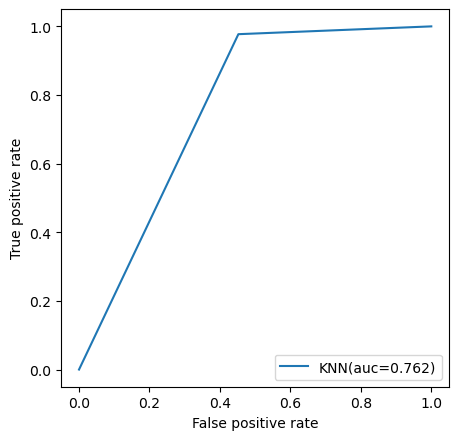

In [143]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,threshold=roc_curve(y_test,pred_test)
auc=auc(fpr,tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label='KNN(auc=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

AUC score is 76.2%

## prediction

In [139]:
dfpred=pd.DataFrame({'Expected':y_test,'Predicted':pred_test})

In [140]:
dfpred.sample(40)

,Expected,Predicted
6,1,1
23,0,0
510,0,1
370,1,1
264,1,1
44,1,1
88,1,1
534,1,1
553,0,0
304,1,1


# Model saving

In [138]:
import pickle
filename="loan status.pkl"
pickle.dump(knn,open(filename,'wb'))